<a href="https://colab.research.google.com/github/quynhkylaphan/python-projects/blob/main/StockTicker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Analysis using Pandas

#### Import modules

In [21]:
import requests
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

#### Define Functions

In [2]:
# get data from a URL (json=False) or an API (json=True), return None if call is not successful
def apiRequest(url, options='',json=True):
    try:
        response = requests.get(url, options)
        if not json and response:
            response.encoding = 'utf-8'
            return response.text
        if response.status_code != 200:
            print("Call returned satus code ", response.status_code)
            raise
        jdata = response.json()
        return jdata
    except:
        print("Call was not successful.")
        return None

In [3]:
#transform the recieved data into a well-formed dataframe
def transform(dataset):
    #convert recieved data into a dataframe called df
    dataframe = pd.DataFrame(dataset['Weekly Adjusted Time Series']).transpose()

    #convert the index of the dataframe into a date object
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe.reset_index(inplace=True)

    #rename columns of the dataframe
    dataframe.rename(columns = {'index': 'DATE', '1. open':'OPEN', '2. high':'HIGH', '3. low':"LOW", '4. close':"CLOSE", '5. adjusted close':'ADJ CLOSE', '6. volume':'VOLUME', '7. dividend amount':'DIVIDEND', '8. split coefficient':'SPLIT COEF'}, inplace = True)

    return dataframe

# <font color=Blue>Assignment</font>

In [4]:
#get an api key from https://www.alphavantage.co/support/#api-key
apiKey = 'BT630XAHJI9BKL2A'
url_endpoint = "https://www.alphavantage.co/query"

In [5]:
#provide a valid stock ticker
stockTicker = 'CRM'

In [6]:
#set the options for your API MSFrequest
opts = {
    'apikey': apiKey,
    'function':'TIME_SERIES_WEEKLY_ADJUSTED',
    'symbol': stockTicker,
    'outputsize':'full'
}

In [7]:
#leverage the provided functions to get the data & transform it into a dataframe
data = apiRequest(url_endpoint,opts)
if data != None:
    df = transform(data)
else:
    print("API call or data transformation failed.")

In [8]:
#display the columns and the column data type of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       1068 non-null   datetime64[ns]
 1   OPEN       1068 non-null   object        
 2   HIGH       1068 non-null   object        
 3   LOW        1068 non-null   object        
 4   CLOSE      1068 non-null   object        
 5   ADJ CLOSE  1068 non-null   object        
 6   VOLUME     1068 non-null   object        
 7   DIVIDEND   1068 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 66.9+ KB


In [9]:
#display the first few rows of the dataframe
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME,DIVIDEND
0,2024-12-10,361.7000,361.7000,347.4300,348.8200,348.8200,12507963,0.0000
1,2024-12-06,332.0000,369.0000,323.6500,361.9900,361.9900,60109875,0.0000
2,2024-11-29,345.0000,347.8500,327.2500,329.9900,329.9900,22599025,0.0000
3,2024-11-22,327.0000,342.9396,316.0001,342.0200,342.0200,27497996,0.0000
4,2024-11-15,325.2500,348.8600,324.1800,325.2600,325.2600,43240432,0.0000


### #1. Prepare the Data for Analysis
<li>Correct the data type for each column</li>
<li>Remove the column ADJ CLOSE

In [10]:
df['OPEN'] = pd.to_numeric(df['OPEN'],errors = 'coerce')
df['HIGH'] = pd.to_numeric(df['HIGH'],errors = 'coerce')
df['LOW'] = pd.to_numeric(df['LOW'],errors = 'coerce')
df['CLOSE'] = pd.to_numeric(df['CLOSE'],errors = 'coerce')
df['ADJ CLOSE'] = pd.to_numeric(df['ADJ CLOSE'],errors = 'coerce')
df['VOLUME'] = pd.to_numeric(df['VOLUME'],errors = 'coerce')
df['DIVIDEND'] = pd.to_numeric(df['DIVIDEND'],errors = 'coerce')

In [11]:
df.drop(columns=['ADJ CLOSE'],inplace=True)

### #2. What date had the highest and lowest close for this stock?

In [12]:
#date with highest close
df.sort_values(by='CLOSE',ascending=False).head(1)

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,DIVIDEND
1,2024-12-06,332.0,369.0,323.65,361.99,60109875,0.0


In [13]:
df.sort_values(by='CLOSE',ascending=True).head(1)

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,DIVIDEND
1061,2004-08-13,10.95,11.05,9.47,9.59,1639300,0.0


### #3. What is the mean trade volume for this stock?

In [14]:
df['VOLUME'].mean()

20469740.25093633

### #4. Which month has the highest average trading volume?

In [15]:
df['MONTH'] = df.DATE.dt.month
avg_volumn = df.groupby('MONTH')['VOLUME'].mean()
highest_avg_volumn = avg_volumn.idxmax()
print('The month with the highest average trading volumn is',highest_avg_volumn)

The month with the highest average trading volumn is 6


### #5. What are the last 5 dates for which dividends have been paid out for this stock?


In [16]:
dividend_dates = df[df['DIVIDEND']>0]['DATE'].head(5)
print('The last 5 dates for which dividends have been paid out for this stock are:')
print(dividend_dates)

The last 5 dates for which dividends have been paid out for this stock are:
12   2024-09-20
22   2024-07-12
39   2024-03-15
Name: DATE, dtype: datetime64[ns]


### #6. Has the stock price gone up over time?

HINT: Graph the stock close price for all years

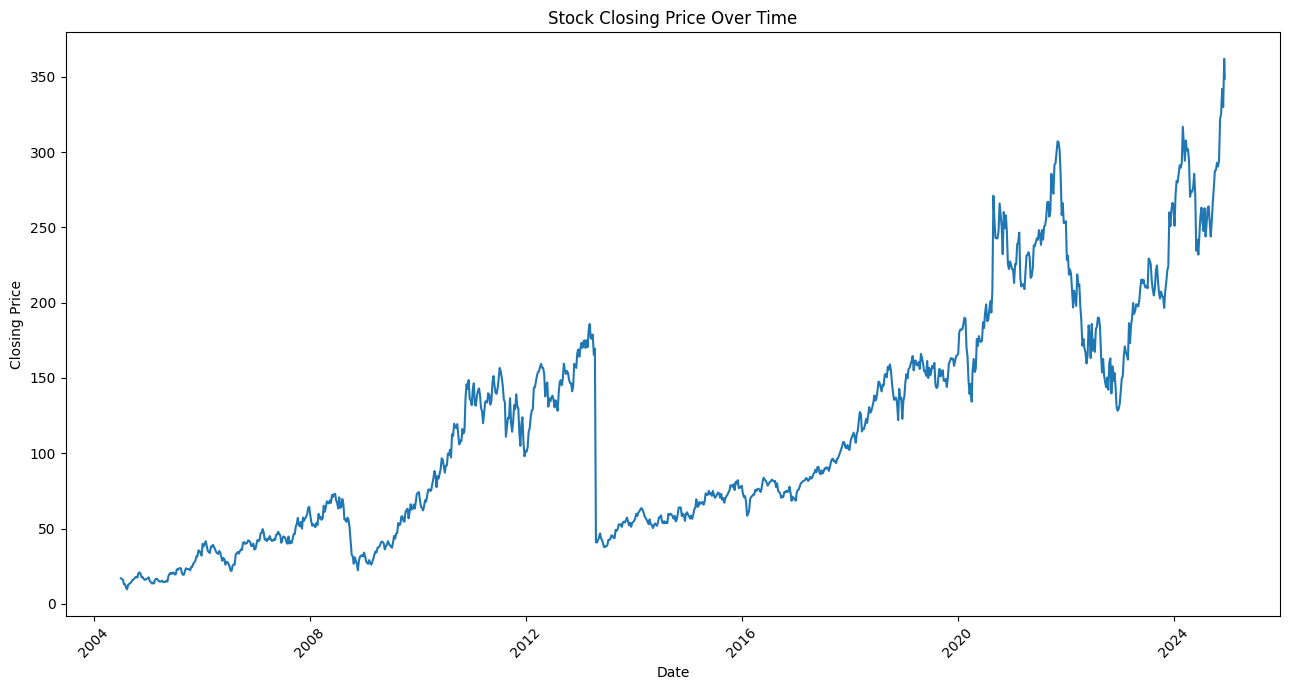

The stock price has gone up over time.


In [26]:
# Convert the 'DATE' column to datetime objects
df['DATE'] = pd.to_datetime(df['DATE'])

# Create the plot
plt.figure(figsize=(13, 7))
plt.plot(df['DATE'], df['CLOSE'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('The stock price has gone up over time.')

### #7. Is the stock price on the rise in 2024?

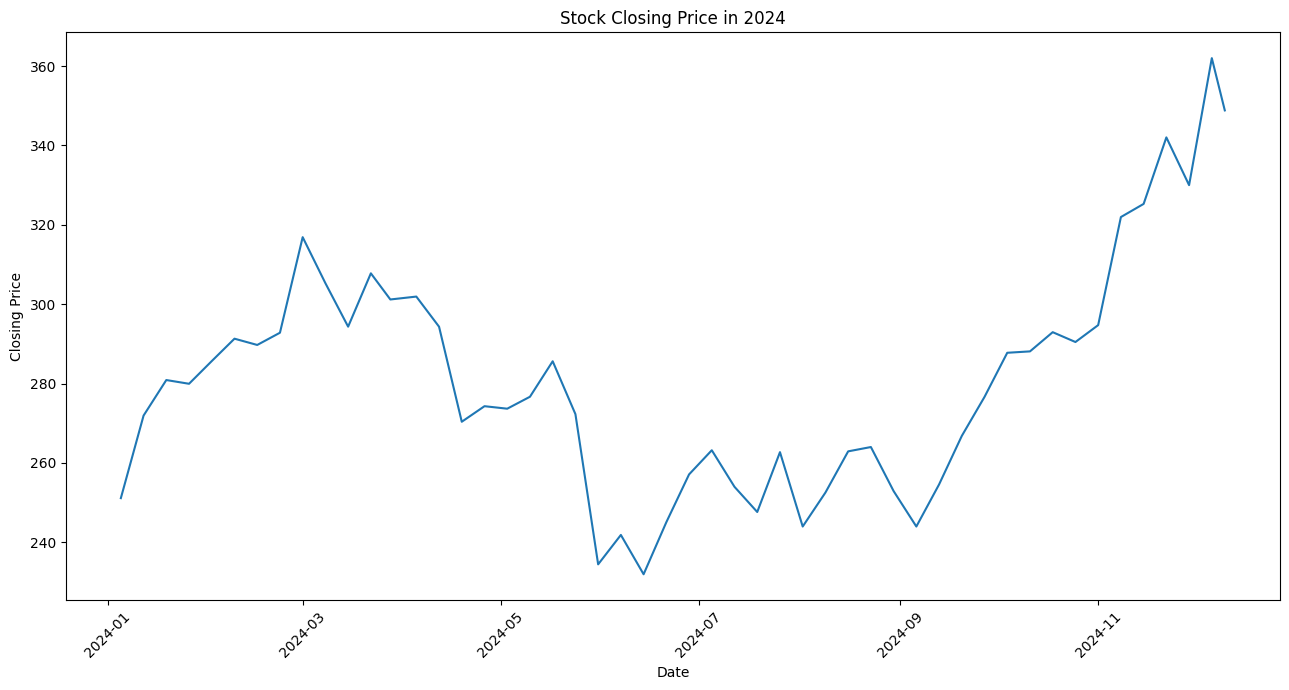

The stock price appears to be on the rise in 2024.


In [27]:
# Filter data for 2024
df_2024 = df[df['DATE'].dt.year == 2024]

# Check if there's data for 2024
if not df_2024.empty:
    # Plot the stock price for 2024
    plt.figure(figsize=(13, 7))
    plt.plot(df_2024['DATE'], df_2024['CLOSE'])
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Stock Closing Price in 2024')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Analyze the trend
    if df_2024['CLOSE'].iloc[-1] > df_2024['CLOSE'].iloc[0]:
        print('The stock price appears to be on the rise in 2024.')
    else:
        print('The stock price does not appear to be on the rise in 2024.')
else:
    print('No data available for 2024.')

### #8. Create a new dataframe with a different stock ticker of your choice. On a single graph plot both the original stock and this stock over 2024 to see if there is any correlation between stock movement.

In [32]:
# Set a second stock ticker, update the parameter, and make an API call
stockTicker2 = 'TSLA'
opts['symbol'] = stockTicker2
data2 = apiRequest(url_endpoint,opts)

# Transform the data into a DataFrame
if data2 != None:
    df2 = transform(data2)
else:
    print("API call or data transformation failed.")

# Convert relevant columns in df2 to numeric data types
df2['OPEN'] = pd.to_numeric(df2['OPEN'],errors = 'coerce')
df2['HIGH'] = pd.to_numeric(df2['HIGH'],errors = 'coerce')
df2['LOW'] = pd.to_numeric(df2['LOW'],errors = 'coerce')
df2['CLOSE'] = pd.to_numeric(df2['CLOSE'],errors = 'coerce')
df2['ADJ CLOSE'] = pd.to_numeric(df2['ADJ CLOSE'],errors = 'coerce')
df2['VOLUME'] = pd.to_numeric(df2['VOLUME'],errors = 'coerce')
df2['DIVIDEND'] = pd.to_numeric(df2['DIVIDEND'],errors = 'coerce')

# Sort the DataFrame by date in ascending order
df2.sort_values(by='DATE', inplace=True)

# Filter the DataFrame to include only data for the year 2024
df2_2024 = df2[df2['DATE'].dt.year == 2024]

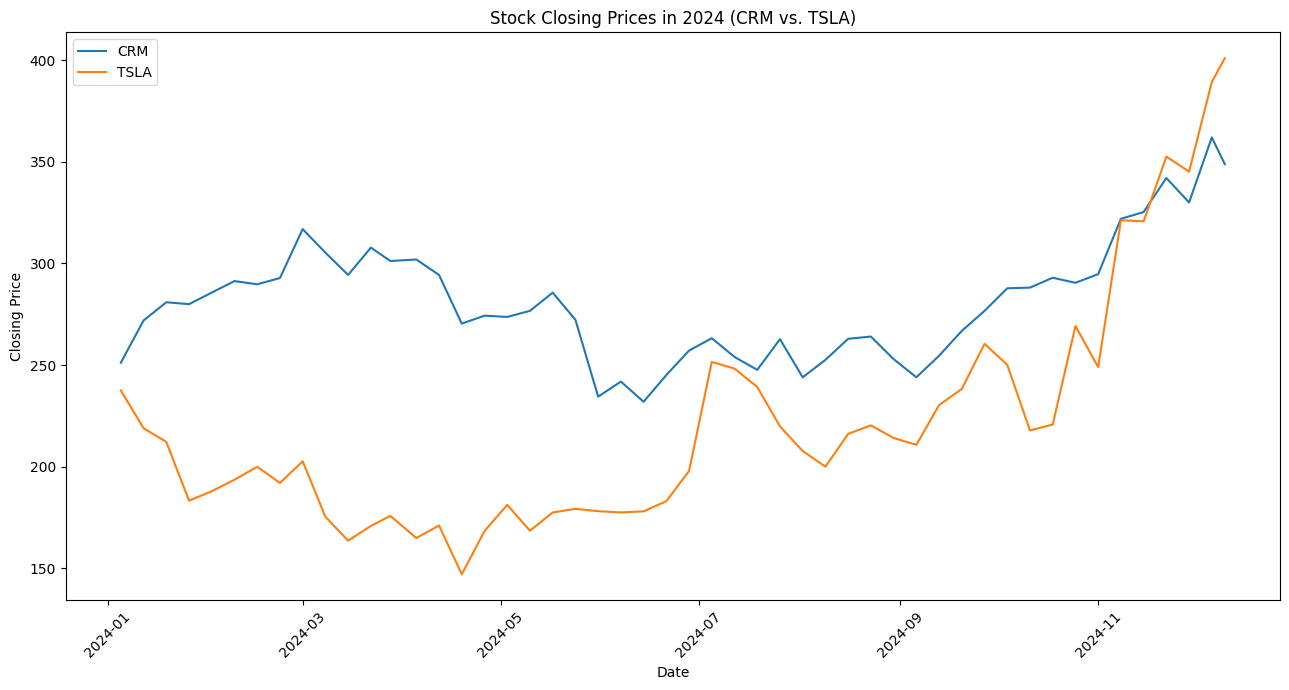

Correlation between CRM and TSLA closing prices in 2024: 0.5917649935596362


In [33]:
# Merge the two dataframes on the 'DATE' column, using the correct suffixes
merged_df = pd.merge(df_2024, df2_2024, on='DATE', suffixes=('_' + stockTicker, '_' + stockTicker2))

# Plot both stocks on a single graph
plt.figure(figsize=(13, 7))
plt.plot(merged_df['DATE'], merged_df['CLOSE_' + stockTicker], label=stockTicker) # Access the correct column name 'CLOSE_CRM'
plt.plot(merged_df['DATE'], merged_df['CLOSE_' + stockTicker2], label=stockTicker2) # Access the correct column name 'CLOSE_TSLA'
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'Stock Closing Prices in 2024 ({stockTicker} vs. {stockTicker2})')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate the correlation between the closing prices using the correct column names
correlation = merged_df['CLOSE_' + stockTicker].corr(merged_df['CLOSE_' + stockTicker2])
print(f"Correlation between {stockTicker} and {stockTicker2} closing prices in 2024: {correlation}")